<a href="https://colab.research.google.com/github/kiplangatkorir/Image-Classification-with-CNNs-on-CIFAR-10/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Normalize the images to a range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
782/782 [==============================] - 100s 126ms/step - loss: 1.6915 - accuracy: 0.3804 - val_loss: 1.3346 - val_accuracy: 0.5224
Epoch 2/10
782/782 [==============================] - 87s 111ms/step - loss: 1.3354 - accuracy: 0.5275 - val_loss: 1.2489 - val_accuracy: 0.5424
Epoch 3/10
782/782 [==============================] - 84s 107ms/step - loss: 1.1762 - accuracy: 0.5877 - val_loss: 1.0733 - val_accuracy: 0.6216
Epoch 4/10
782/782 [==============================] - 79s 101ms/step - loss: 1.0698 - accuracy: 0.6283 - val_loss: 0.9844 - val_accuracy: 0.6561
Epoch 5/10
782/782 [==============================] - 82s 105ms/step - loss: 0.9950 - accuracy: 0.6521 - val_loss: 0.9310 - val_accuracy: 0.6706
Epoch 6/10
782/782 [==============================] - 86s 110ms/step - loss: 0.9342 - accuracy: 0.6754 - val_loss: 0.9013 - val_accuracy: 0.6831
Epoch 7/10
782/782 [==============================] - 76s 98ms/step - loss: 0.8748 - accuracy: 0.6938 - val_loss: 0.8559 - val_ac

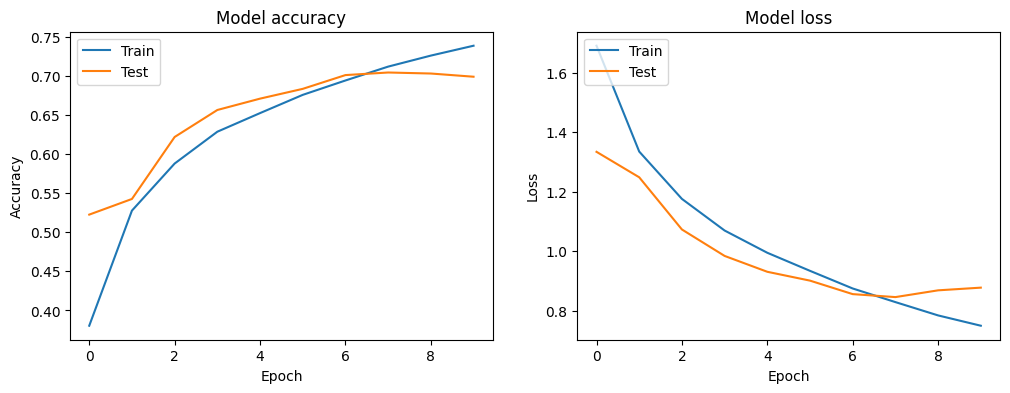

313/313 [==============================] - 10s 32ms/step


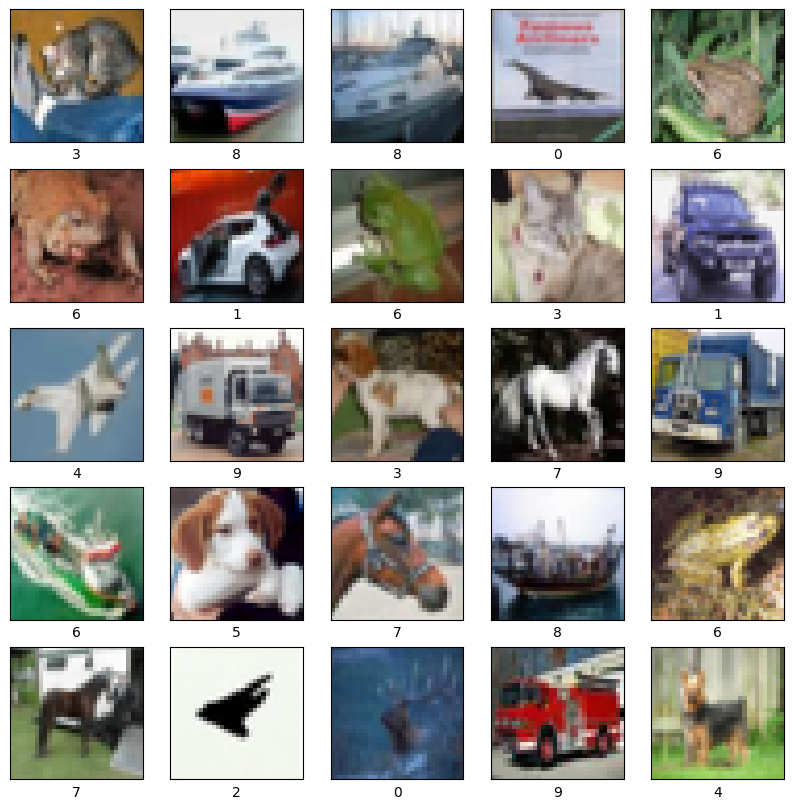

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predict on test data
predictions = model.predict(x_test)

# Display some sample predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(np.argmax(predictions[i]))
plt.show()
